In [22]:
import csv
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils import shuffle
from scipy.sparse import coo_matrix
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [23]:
x = []
y = []
data_freq = []
data_freq_e = []
data_freq_p = []

for idx in range(22):
    data_freq.append(defaultdict(int))
    data_freq_e.append(defaultdict(int))
    data_freq_p.append(defaultdict(int))

with open('agaricus-lepiota.data', newline='') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        if '?' in row:
            continue
        y.append(row[0])
        x.append(row[1:])
        
        if y[-1] == 'e':
            for idx in range(22):
                data_freq_e[idx][x[-1][idx]] += 1
        if y[-1] == 'p':
            for idx in range(22):
                data_freq_p[idx][x[-1][idx]] += 1
        for idx in range(22):
            data_freq[idx][x[-1][idx]] += 1
            x[-1][idx] = ord(x[-1][idx]) - ord('a')
            
x = np.array(x)
y = np.array(y)

X_sparse = coo_matrix(x)
x, X_sparse, y = shuffle(x, X_sparse, y, random_state=0)

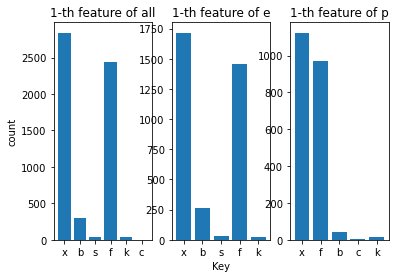

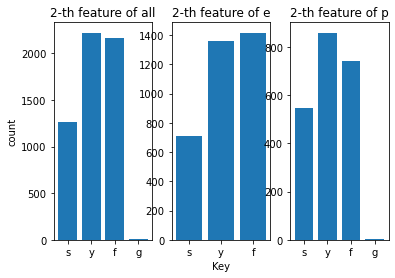

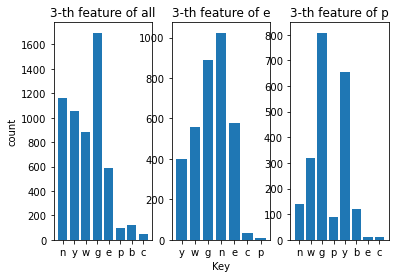

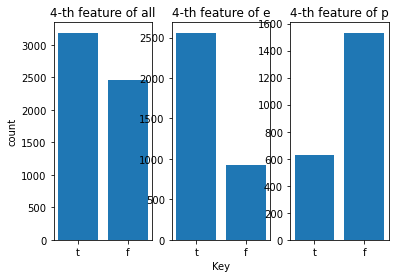

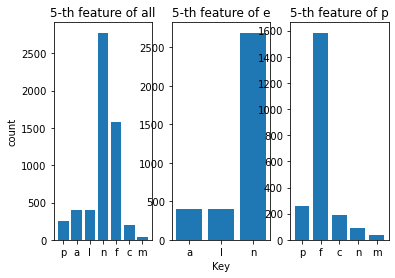

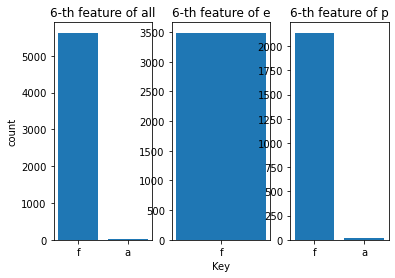

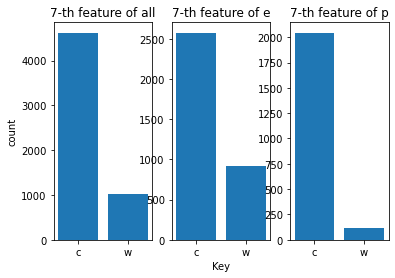

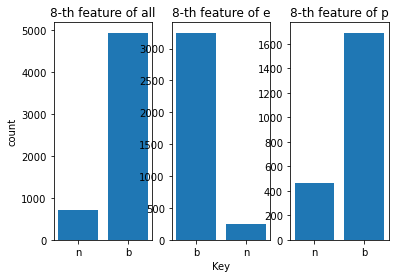

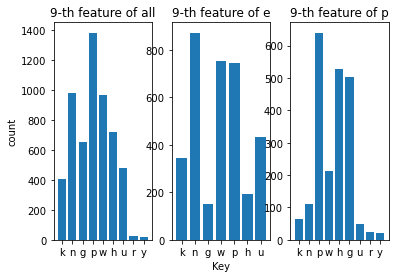

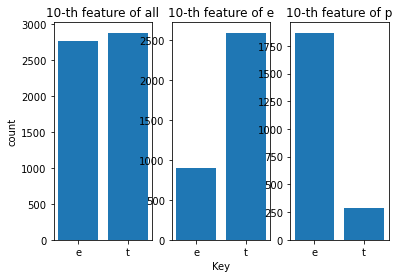

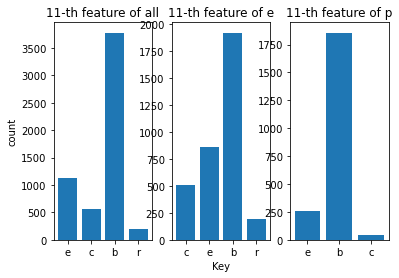

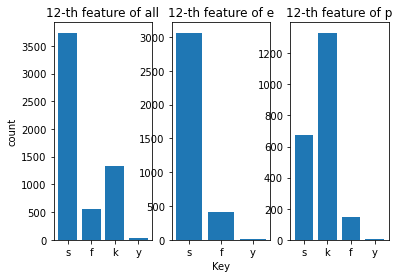

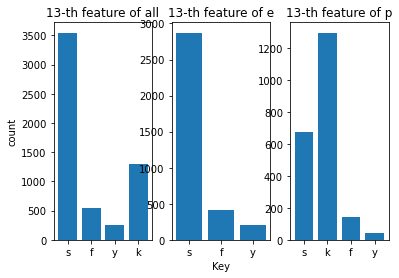

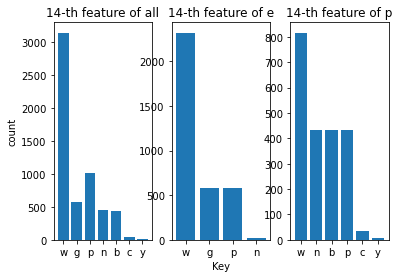

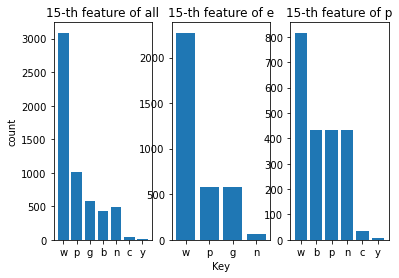

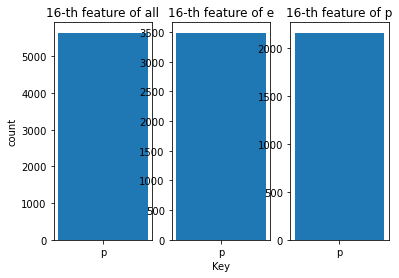

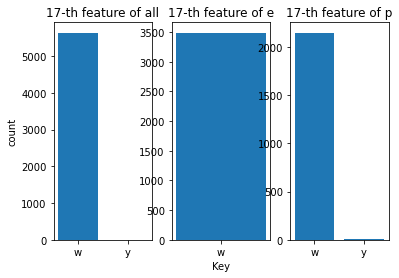

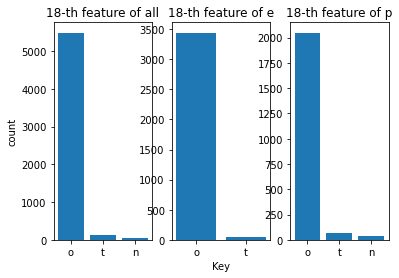

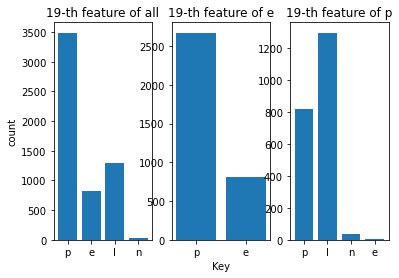

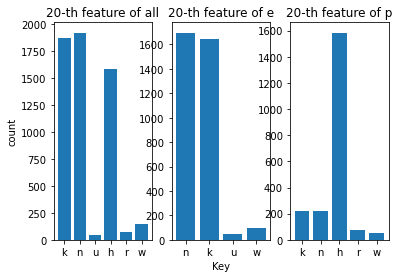

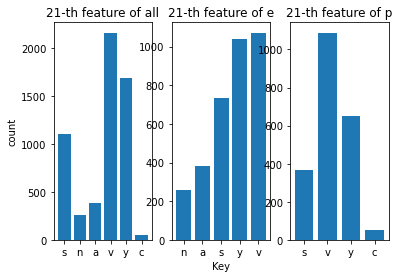

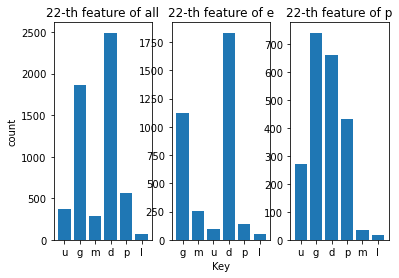

In [24]:
for idx in range(22):
    tolist = data_freq[idx].items()
    tolist_e = data_freq_e[idx].items()
    tolist_p = data_freq_p[idx].items()

    i, j = zip(*tolist) 
    i_e, j_e = zip(*tolist_e) 
    i_p, j_p = zip(*tolist_p) 

    if 1 :
        plt.subplot(1, 3, 1)
        plt.bar(i, j)
        plt.title(str(idx+1) + '-th feature of all')
        plt.ylabel('count')

        plt.subplot(1, 3, 2)
        plt.bar(i_e, j_e)
        plt.title(str(idx+1) + '-th feature of e')
        plt.xlabel('Key')

        plt.subplot(1, 3, 3)
        plt.bar(i_p, j_p)
        plt.title(str(idx+1) + '-th feature of p')
        plt.show()
        

## Naïve Bayes Without Laplace smoothing & Holdout validation

C:\Users\banne2266.cs07\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


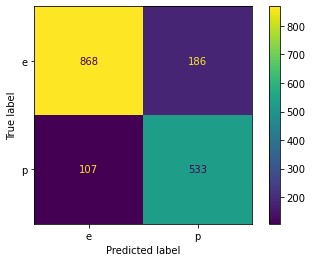

              precision    recall  f1-score   support

           e       0.89      0.82      0.86      1054
           p       0.74      0.83      0.78       640

    accuracy                           0.83      1694
   macro avg       0.82      0.83      0.82      1694
weighted avg       0.83      0.83      0.83      1694



In [25]:
without_laplace = MultinomialNB(alpha=0.0)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=777)
without_laplace.fit(X_train, y_train)
y_pred = without_laplace.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=without_laplace.classes_).plot()
plt.show()
print(report)

## Naïve Bayes With Laplace smoothing & Holdout validation

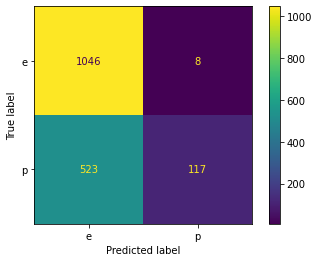

              precision    recall  f1-score   support

           e       0.67      0.99      0.80      1054
           p       0.94      0.18      0.31       640

    accuracy                           0.69      1694
   macro avg       0.80      0.59      0.55      1694
weighted avg       0.77      0.69      0.61      1694



In [26]:
with_laplace = MultinomialNB(alpha=100000)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=777)
with_laplace.fit(X_train, y_train)
y_pred = with_laplace.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=with_laplace.classes_).plot()
plt.show()
print(report)



## Naïve Bayes Without Laplace smoothing & K-fold cross-validation

C:\Users\banne2266.cs07\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\banne2266.cs07\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\banne2266.cs07\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


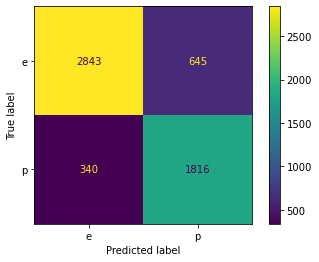

              precision    recall  f1-score   support

           e       0.89      0.82      0.85      3488
           p       0.74      0.84      0.79      2156

    accuracy                           0.83      5644
   macro avg       0.82      0.83      0.82      5644
weighted avg       0.83      0.83      0.83      5644



In [27]:
kf = KFold(n_splits=3)
kf.get_n_splits(x)
without_laplace = MultinomialNB(alpha=0.0)

true_class = []
pred_class = []
CM_list = np.zeros((2,2)).astype(int)


for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    without_laplace.fit(X_train, y_train)
    y_pred = without_laplace.predict(X_test)

    true_class.extend(y_test)
    pred_class.extend(y_pred)

    CM = confusion_matrix(y_test, y_pred)
    CM_list += CM
    
    
report = classification_report(true_class, pred_class)
ConfusionMatrixDisplay(confusion_matrix=CM_list, display_labels=without_laplace.classes_).plot()
plt.show()
print(report)




## Naïve Bayes With Laplace smoothing & K-fold cross-validation

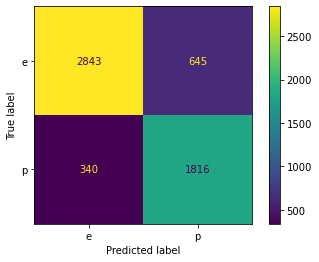

              precision    recall  f1-score   support

           e       0.89      0.82      0.85      3488
           p       0.74      0.84      0.79      2156

    accuracy                           0.83      5644
   macro avg       0.82      0.83      0.82      5644
weighted avg       0.83      0.83      0.83      5644



In [28]:
kf = KFold(n_splits=3)
kf.get_n_splits(x)
with_laplace = MultinomialNB(alpha=1)

true_class = []
pred_class = []
CM_list = np.zeros((2,2)).astype(int)

for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    with_laplace.fit(X_train, y_train)
    y_pred = with_laplace.predict(X_test)

    true_class.extend(y_test)
    pred_class.extend(y_pred)

    CM = confusion_matrix(y_test, y_pred)
    CM_list += CM
    
report = classification_report(true_class, pred_class)
ConfusionMatrixDisplay(confusion_matrix=CM_list, display_labels=with_laplace.classes_).plot()
plt.show()
print(report)
